# This notebook shows the machine learning algorithms built from scratch without any libraries :

1. Linear Regression
2. Logistic Regression
3. Naive Bayes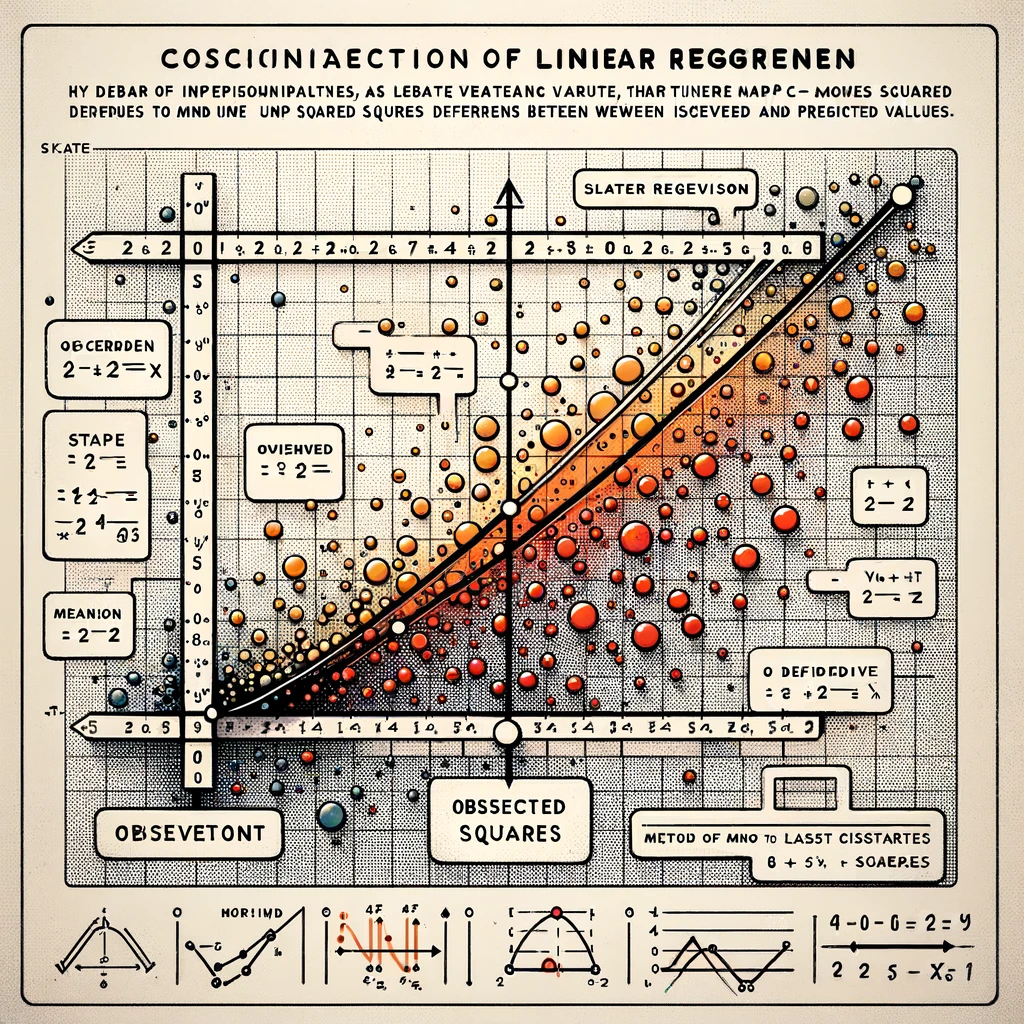

In [1]:
# Linear Regression

In [26]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
# Load CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        value = row[column]
        try:
            row[column] = float(value.strip())
        except ValueError:
            print(f"Warning: Could not convert value '{value}' to float in column {column}.")
            row[column] = 0  # Or any other default value you prefer




# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    # Filter out non-numeric values and convert the rest to floats
    float_values = [float(val) for val in values if isinstance(val, str) and val.replace('.', '', 1).isdigit()]
    if len(float_values) == 0:
        return 0  # Or any other default value you prefer
    return sum(float_values) / float(len(float_values))




# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        # Ensure that x and y values are floats
        if isinstance(x[i], float) and isinstance(y[i], float):
            covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar


# Calculate the variance of a list of numbers
def variance(values, mean):
    # Filter out non-numeric values and convert the rest to floats
    float_values = [float(val) for val in values if isinstance(val, float)]
    return sum([(x-mean)**2 for x in float_values])


# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    x_variance = variance(x, x_mean)
    if x_variance == 0:
        return [0, 0]  # Or any other default coefficients you prefer
    b1 = covariance(x, x_mean, y, y_mean) / x_variance
    b0 = y_mean - b1 * x_mean
    return [b0, b1]


# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Set seed for reproducibility
seed(1)

# Load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

# Evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

RMSE: 18371.345


In [27]:
# Logistic Regression

In this i will discuss about the mathematical formulation of logistic regression

1.Sigmoid Function (Activation Function):
The sigmoid function is used to map the output of the linear equation to a value between 0 and 1. It's defined as:

σ(z) = 1 / (1 + e^(-z))

where z is the linear combination of features and weights, e is the base of the natural logarithm, and σ(z) represents the probability of the positive class.


In [30]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


2.Cost Function:
The cost function measures the difference between the predicted probability and the actual label. For logistic regression, we use the log loss (or cross-entropy) cost function, given by:

J(θ) = - (1/m) * ∑[y(i) * log(hθ(x(i))) + (1 - y(i)) * log(1 - hθ(x(i)))]

where:
- m is the number of training examples.
- y(i) is the actual label of the ith training example.
- hθ(x(i)) is the predicted probability of the positive class for the ith training example.


In [31]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


Gradient Descent:
Gradient descent is used to minimize the cost function by updating the parameters (weights) iteratively. The update rule for each parameter θ_j is given by:

θ_j := θ_j - α * ∂/∂θ_j J(θ)

where:
- α is the learning rate.
- ∂/∂θ_j J(θ) is the partial derivative of the cost function with respect to θ_j.


In [32]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta


Prediction:
To make predictions, we use the learned parameters θ to calculate the predicted probability for each example and classify them based on a threshold (e.g., 0.5).


In [33]:
def predict(X, theta):
    h = sigmoid(np.dot(X, theta))
    predictions = [1 if p >= 0.5 else 0 for p in h]
    return predictions


All together the code is below:

In [35]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        cost = -1 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y, theta):
        m = len(y)
        for _ in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, theta))
            gradient = np.dot(X.T, (h - y)) / m
            theta -= self.learning_rate * gradient
        return theta

    def fit(self, X, y):
        # Add bias term
        X = np.insert(X, 0, 1, axis=1)
        num_features = X.shape[1]
        self.theta = np.zeros(num_features)
        self.theta = self.gradient_descent(X, y, self.theta)

    def predict(self, X):
        # Add bias term
        X = np.insert(X, 0, 1, axis=1)
        h = self.sigmoid(np.dot(X, self.theta))
        predictions = [1 if p >= 0.5 else 0 for p in h]
        return predictions

# Example usage:
# Create a LogisticRegression object
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Generate some dummy data for demonstration
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print(predictions)


[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]


In [36]:
# Naive Bayes

The Naive Bayes algorithm is a probabilistic classifier based on Bayes' Theorem, which is used in machine learning to make predictions and classify data. It's called "naive" because it makes a strong assumption that the features of the input data are mutually independent given the target variable. This simplification makes Naive Bayes fast and effective, particularly in text classification tasks such as spam detection and sentiment analysis.

Bayes' Theorem
Bayes' Theorem is the foundation of the Naive Bayes classifier. It describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The theorem is mathematically stated as:

P(A | B) = (P(B | A) * P(A)) / P(B)

Where:
P(A | B) is the posterior probability of class (A, target) given predictor (B, attributes).
P(B | A) is the likelihood which is the probability of predictor given class.
P(A) is the prior probability of class.
P(B) is the prior probability of predictor.

Applying Naive Bayes
When applying Naive Bayes classification to a problem, the goal is to find the class C_k with the highest posterior probability given the predictor attributes x. According to Bayes' theorem, the decision rule becomes:

P(C_k | x) = (P(x | C_k) * P(C_k)) / P(x)

Because P(x) is constant for all classes, only the numerator needs to be maximized:

P(C_k | x) ∝ P(x | C_k) * P(C_k)

Given the naive conditional independence assumption:

P(x | C_k) = P(x_1, x_2, ..., x_n | C_k) = Π from i=1 to n P(x_i | C_k)

Where x_i are the features of the instance.


In [37]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.cond_probs = {}

    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier according to X, y.
        """
        # Calculate the prior probabilities of each class
        unique_classes, counts = np.unique(y, return_counts=True)
        self.class_probs = {cls: count / len(y) for cls, count in zip(unique_classes, counts)}

        # Calculate the conditional probabilities
        self.cond_probs = {cls: {} for cls in unique_classes}
        features = zip(*X)
        for feature_index, feature in enumerate(features):
            for cls in unique_classes:
                feature_given_class = [f for f, label in zip(feature, y) if label == cls]
                unique_features, counts = np.unique(feature_given_class, return_counts=True)
                probabilities = {f: count / len(feature_given_class) for f, count in zip(unique_features, counts)}
                self.cond_probs[cls][feature_index] = probabilities

    def predict(self, X):
        """
        Perform classification on an array of test vectors X.
        """
        results = []
        for features in X:
            class_scores = {}
            for cls, class_prob in self.class_probs.items():
                score = np.log(class_prob)  # Use log probabilities to avoid floating point underflow
                for feature_index, feature in enumerate(features):
                    feature_probs = self.cond_probs[cls].get(feature_index, {})
                    score += np.log(feature_probs.get(feature, 1e-6))  # Small constant to handle zero probabilities
                class_scores[cls] = score
            results.append(max(class_scores, key=class_scores.get))
        return results

# Example usage
X = [['sunny', 'hot'], ['rainy', 'cold'], ['sunny', 'cold'], ['rainy', 'hot']]
y = ['play', 'play', 'study', 'study']
model = NaiveBayesClassifier()
model.fit(X, y)
predictions = model.predict([['sunny', 'cold']])
print("Predictions:", predictions)


Predictions: ['play']


              +------------+
              |   Prior    |
              |  P(C_k)    |
              +-----+------+
                    |
          +---------v----------+
          |  Likelihood        |
          |  P(x_i | C_k)      |
          +---------+----------+
                    |
          +---------v----------+
          |   Posterior        |
          |  P(C_k | x)        |
          +--------------------+
